<a href="https://colab.research.google.com/github/benchrisblair/cap-comp215/blob/main/examples/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generators and Random Numbers
This is our week 4 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [1]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

## Examples: generator expressions

In [7]:
# Generator Expression
neighbours = ((i-1, i, i+1) for i in range(1, 10))
print(neighbours)

# We can turn a generator into a list to look at all its elements (though this somewhat defeats the purpose!)
print(list(neighbours))

# Once the "stream" has flowed past, it is empty - there is no way to "replenish" it.
print(list(neighbours))

<generator object <genexpr> at 0x7f637a0bf5f0>
[(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [8]:
# Generator Function
def generate_neighbours(upper_bound):
    for i in range(1, upper_bound):
        yield (i-1, i, i+1)

neighbours2 = generate_neighbours(10)  # This creates the same generator as above

print(neighbours2)

print(next(neighbours2))
print(next(neighbours2))
print(next(neighbours2))

print(list(neighbours2))
print(list(neighbours2))

<generator object generate_neighbours at 0x7f637a0bff90>
(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
[(3, 4, 5), (4, 5, 6), (5, 6, 7), (6, 7, 8), (7, 8, 9), (8, 9, 10)]
[]


In [9]:
# Create an infinite generator function
def generate_infinite_neighbours():
    i = 1
    while True:
        yield (i-1, i, i+1)
        i = i+1

neighbours3 = generate_infinite_neighbours()

print(next(neighbours3))
print(next(neighbours3))
print(next(neighbours3))

for j in range(10):
    print(next(neighbours3))

# Note: Do NOT use the list() function with an infinite generator

(0, 1, 2)
(1, 2, 3)
(2, 3, 4)
(3, 4, 5)
(4, 5, 6)
(5, 6, 7)
(6, 7, 8)
(7, 8, 9)
(8, 9, 10)
(9, 10, 11)
(10, 11, 12)
(11, 12, 13)
(12, 13, 14)


15
36
45
39
66
48
60
6
42
18
57
54
33
24
30
3
21
9
63
27
51
12
15 --> The period restarts.
36
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[15, 36, 45, 39, 66, 48, 60, 6, 42, 18, 57, 54, 33, 24, 30, 3, 21, 9, 63, 27, 51, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[15, 36, 45, 39, 66, 48, 60, 6, 42, 18, 57, 54, 33, 24, 30, 3, 21, 9, 63, 27, 51, 12, 15, 36, 45, 39, 66, 48, 60, 6, 42, 18, 57, 54, 33, 24, 30, 3, 21, 9, 63, 27, 51, 12, 15, 36, 45, 39, 66, 48, 60, 6, 42, 18, 57, 54, 33, 24, 30, 3, 21, 9, 63, 27, 51, 12]


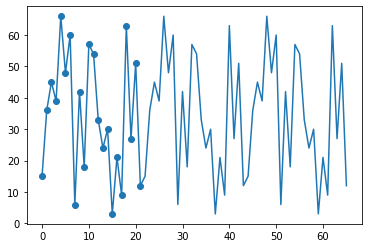

In [24]:
# A simple pseudo-random number generator
# x = x // 10 + 7 * (x % 10)
# This is a chaotic function.
# It is different from other functions in that it feeds the result back into the function.
# It has some attributes of a deterministic function and some of a random system.

def pseudoRand(seed=12):
    while True:
        seed = seed // 10 + 7 * (seed % 10)
        yield seed

rand_val = pseudoRand()
print(next(rand_val))      # Print the first value
print(next(rand_val))      # Print the second value
for i in range(20):        # Print the next 20 values
    print(next(rand_val))

# After 22 values, the output is repeated
print(next(rand_val), "--> The period restarts.")
print(next(rand_val))

# We can also graph the output using Matplotlib
rand_val2 = pseudoRand()

x_values = [i for i in range(22)]
y_values = [next(rand_val2) for i in range(22)]
print(x_values)
print(y_values)

plt.scatter(x_values, y_values)  # This plot looks random

x_values = [i for i in range(66)]
y_values = [next(rand_val2) for i in range(66)]
print(x_values)
print(y_values)

plt.plot(x_values, y_values)  # A pattern emerges when plotting more data points

## Pseudo-Random Numbers

In [25]:
# A list of n random numbers - again we are turning a "generator" into a list
n = 10
[random.random() for i in range(n)]

[0.23616702306451665,
 0.9378988813278887,
 0.72292097931861,
 0.4699499217383819,
 0.7933188752122226,
 0.021742724251374912,
 0.10205007023990165,
 0.302372806601679,
 0.8086045658910277,
 0.22010391878542213]

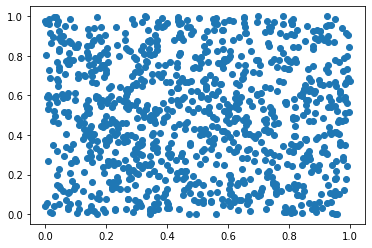

In [26]:
# Scatter plot of random (x,y) coordinates
n = 1000
fig, ax = plt.subplots()
ax.scatter([random.random() for i in range(n)], [random.random() for i in range(n)])
ax

## Chaotic Feedback

 * some mathematical functions produce chaotic patterns when you feed their output back in as the next input.

In [37]:
# Our simple pseudo-random number generator from above provides an example
# of chaotic feedback.

import time

class TwoDigitRand:
    """ Demonstrates 'chaotic feedback' algorithm - not crypographic quality randomness!! """
    def __init__(self, seed=None):
        seed = seed or int(time.time()*10**3)  # clock time in milliseconds
        self.seed = seed % 100  # 2-digit only!

    def rand(self):
        """ Chaotic feedback algorithm - the last output is used as input to compute the next one """
        self.seed = self.seed//10 + 7*(self.seed%10)
        return self.seed


r = TwoDigitRand()
[r.rand() for i in range(20)]

[35, 38, 59, 68, 62, 20, 2, 14, 29, 65, 41, 11, 8, 56, 47, 53, 26, 44, 32, 17]

Sequence seed: 17


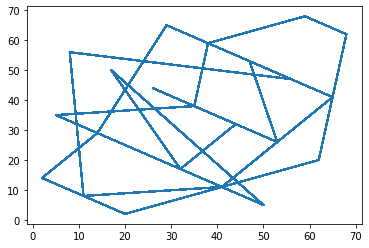

In [38]:
# Scatter plot of (seed, rand(seed))
fig, ax = plt.subplots()
print("Sequence seed:", r.seed)
pairs = [(r.seed, r.rand()) for i in range(n)]
ax.plot([x for x,y in pairs], [y for x,y in pairs])
ax

## Example: computational experiment with random numbers

We'll use the Histogram class developed last week to count the outcomes of the experiment

In [39]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel=None):
        fig, ax = plt.subplots()
        ax.set_title(title)
        if xlabel:
            ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        self.ax = ax
        self.fig = fig
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

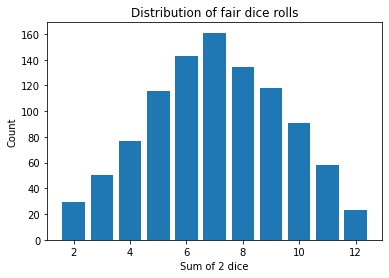

In [40]:
# Experiment: Roll some dice
def roll_dice(sides=6):
    return (random.randint(1,sides), random.randint(1,sides))

# Number rolls to use in this experiment
n_rolls = 1000

rolls = Histogram("Distribution of fair dice rolls", xlabel='Sum of 2 dice')
for i in range(n_rolls):
    rolls.count(sum(roll_dice()))

rolls.plot()